# 金融风控-贷款违约预测

### 1. 赛题概况
  **赛题目标为预测用户是否违约，是个典型的二分类问题。由于贷款违约是个小概率事件，数据中可能存在不平衡问题，在后期分析过程中需要注意。**

贷款业务中，普遍使用信用评分，根据客户的多个特征对每个客户进行打分，以期待对客户优质与否做一个评判。信用评分卡有三种：  
- A卡（Application scorecard）, 即申请评分卡。用于贷款审批前期对借款申请人的量化评估；
- B卡（Behavior scorecard），即行为评分卡。用于贷后管理，通过借款人的还款以及交易行为，结合其他维度的数据预测借款人未来的还款能力和意愿;
- C卡（Collection scorecard）,即催收评分卡。在借款人当前还款状态为逾期的情况下，预测未来该笔贷款变为坏账的概率。  
三种评分卡根据使用时间不同，分别侧重贷前，贷中和贷后。

### 2. 数据概况

In [1]:
import pandas as pd

In [2]:
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/testA.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 48 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  200000 non-null  int64  
 1   loanAmnt            200000 non-null  float64
 2   term                200000 non-null  int64  
 3   interestRate        200000 non-null  float64
 4   installment         200000 non-null  float64
 5   grade               200000 non-null  object 
 6   subGrade            200000 non-null  object 
 7   employmentTitle     200000 non-null  float64
 8   employmentLength    188258 non-null  object 
 9   homeOwnership       200000 non-null  int64  
 10  annualIncome        200000 non-null  float64
 11  verificationStatus  200000 non-null  int64  
 12  issueDate           200000 non-null  object 
 13  purpose             200000 non-null  int64  
 14  postCode            200000 non-null  float64
 15  regionCode          200000 non-nul

|Field|Description|
|---|---|
|id|为贷款清单分配的唯一信用证标识|
|loanAmnt|贷款金额|
|term|贷款期限（year）|
|interestRate|贷款利率|
|installment|分期付款金额|
|grade |	贷款等级|
|subGrade 	|贷款等级之子级|
|employmentTitle 	|就业职称|
|employmentLength 	|就业年限（年）|
|homeOwnership |	借款人在登记时提供的房屋所有权状况|
|annualIncome |	年收入|
|verificationStatus |	验证状态|
|issueDate 	|贷款发放的月份|
|purpose |	借款人在贷款申请时的贷款用途类别|
|postCode |	借款人在贷款申请中提供的邮政编码的前3位数字|
|regionCode |	地区编码|
|dti 	|债务收入比|
|delinquency_2years |	借款人过去2年信用档案中逾期30天以上的违约事件数|
|ficoRangeLow 	|借款人在贷款发放时的fico所属的下限范围|
|ficoRangeHigh |	借款人在贷款发放时的fico所属的上限范围|
|openAcc |	借款人信用档案中未结信用额度的数量|
|pubRec |	贬损公共记录的数量|
|pubRecBankruptcies |	公开记录清除的数量|
|revolBal |	信贷周转余额合计|
|revolUtil 	|循环额度利用率，或借款人使用的相对于所有可用循环信贷的信贷金额|
|totalAcc |	借款人信用档案中当前的信用额度总数|
|initialListStatus |	贷款的初始列表状态|
|applicationType |	表明贷款是个人申请还是与两个共同借款人的联合申请|
|earliesCreditLine |	借款人最早报告的信用额度开立的月份|
|title |	借款人提供的贷款名称|
|policyCode 	|公开可用的策略_代码=1新产品不公开可用的策略_代码=2|
|n系列匿名特征 |	匿名特征n0-n14，为一些贷款人行为计数特征的处理|
|isDefault|是否违约（只存在与train中）

查看label的数据量分布，存在数据不平衡

In [7]:
train_data["isDefault"].value_counts()

0    640390
1    159610
Name: isDefault, dtype: int64

### 3. 评估指标
评价方法为AUC评估模型效果（越大越好），AUC介于(0,1]之间

In [11]:
from sklearn.metrics import roc_auc_score
import numpy as np

In [12]:
y_true = np.array([0, 0, 1, 1])
y_scores = np.array([0.1, 0.4, 0.35, 0.8])
print('AUC socre:',roc_auc_score(y_true, y_scores))

AUC socre: 0.75


### 4. 拓展知识

#### 4.1 WOE变换

WOE的全称是“Weight of Evidence”，即证据权重。WOE是对原始自变量的一种编码形式。要对一个变量进行WOE编码，需要首先把这个变量进行分组处理（也叫离散化、分箱）。公示如下：

<center>$WOE_i$ = $ln$$\frac{\frac{y_i}{y_T}}{\frac{n_i}{n_T}}$</center>

#### 4.2 IV变换

IV的全称是Information Value，中文意思是信息价值，或者信息量。可以用来衡量自变量的预测能力，类似于基尼系数、信息增益。公示如下：

<center>$IV_i$ = ($\frac{y_i}{y_T}$ - $\frac{n_i}{n_T}$)*$ln$$\frac{\frac{y_i}{y_T}}{\frac{n_i}{n_T}}$</center>

举例说明：

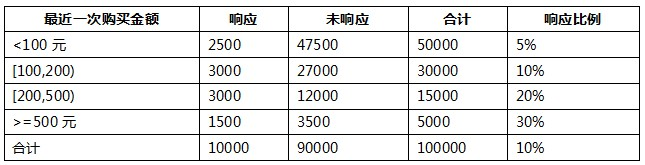

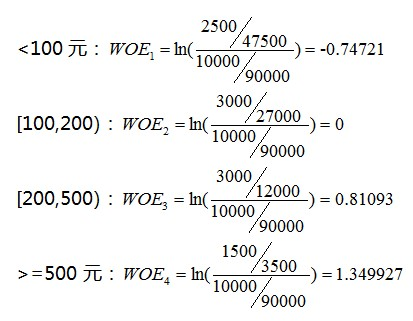

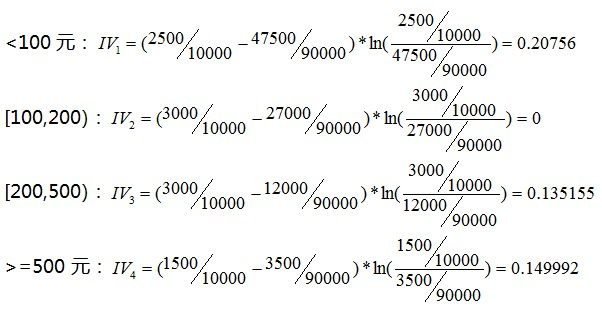!